In [1]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
# rest of the code

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import time
import csv
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
np.random.seed(1234)

C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
with open('household_power_consumption.txt','r') as f:
    data = csv.reader(f, delimiter=";")
    power=[]
    for line in data:
        try:
            power.append(float(line[2]))
        except:
            pass
    

In [6]:
power[0], len(power)

(4.216, 2049280)

In [7]:
sequence_length=50
result = []
for index in range(len(power) - sequence_length):
      result.append(power[index: index + sequence_length])
# result = np.array(result)  # shape (2049230, 50)

In [8]:
result=np.array(result)

In [9]:
result.shape

(2049230, 50)

In [10]:
result[0]


array([4.216, 5.36 , 5.374, 5.388, 3.666, 3.52 , 3.702, 3.7  , 3.668,
       3.662, 4.448, 5.412, 5.224, 5.268, 4.054, 3.384, 3.27 , 3.43 ,
       3.266, 3.728, 5.894, 7.706, 7.026, 5.174, 4.474, 3.248, 3.236,
       3.228, 3.258, 3.178, 2.72 , 3.758, 4.342, 4.512, 4.058, 2.472,
       2.79 , 2.624, 2.772, 3.74 , 4.928, 6.052, 6.752, 6.474, 6.308,
       4.464, 3.396, 3.09 , 3.73 , 2.308])

In [11]:
result[1]

array([5.36 , 5.374, 5.388, 3.666, 3.52 , 3.702, 3.7  , 3.668, 3.662,
       4.448, 5.412, 5.224, 5.268, 4.054, 3.384, 3.27 , 3.43 , 3.266,
       3.728, 5.894, 7.706, 7.026, 5.174, 4.474, 3.248, 3.236, 3.228,
       3.258, 3.178, 2.72 , 3.758, 4.342, 4.512, 4.058, 2.472, 2.79 ,
       2.624, 2.772, 3.74 , 4.928, 6.052, 6.752, 6.474, 6.308, 4.464,
       3.396, 3.09 , 3.73 , 2.308, 2.388])

In [12]:
    result_mean = result.mean()
    result -= result_mean
    print ("Shift : ", result_mean)
    print ("Data  : ", result.shape)

Shift :  1.0915781041659507
Data  :  (2049230, 50)


In [13]:
result[0]

array([3.1244219, 4.2684219, 4.2824219, 4.2964219, 2.5744219, 2.4284219,
       2.6104219, 2.6084219, 2.5764219, 2.5704219, 3.3564219, 4.3204219,
       4.1324219, 4.1764219, 2.9624219, 2.2924219, 2.1784219, 2.3384219,
       2.1744219, 2.6364219, 4.8024219, 6.6144219, 5.9344219, 4.0824219,
       3.3824219, 2.1564219, 2.1444219, 2.1364219, 2.1664219, 2.0864219,
       1.6284219, 2.6664219, 3.2504219, 3.4204219, 2.9664219, 1.3804219,
       1.6984219, 1.5324219, 1.6804219, 2.6484219, 3.8364219, 4.9604219,
       5.6604219, 5.3824219, 5.2164219, 3.3724219, 2.3044219, 1.9984219,
       2.6384219, 1.2164219])

In [14]:
result.shape

(2049230, 50)

In [15]:
    row = int(round(0.9 * result.shape[0]))
    train = result[:row, :]
    np.random.shuffle(train)
    X_train = train[:, :-1]
    y_train = train[:, -1]
    X_test = result[row:, :-1]
    y_test = result[row:, -1]

In [16]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1844307, 49), (1844307,), (204923, 49), (204923,))

In [17]:
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [18]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1844307, 49, 1), (1844307,), (204923, 49, 1), (204923,))

In [19]:
model = Sequential()
layers = [1, 50, 100, 1]

model.add(LSTM(
        layers[1],
        input_shape=(None, layers[0]),
        return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
        layers[2],
        return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
        layers[3]))
model.add(Activation("linear"))

start = time.time()
model.compile(loss="mse", optimizer="rmsprop")
print ("Compilation Time : ", time.time() - start)
    


Compilation Time :  0.0370640754699707


In [20]:
model.fit(X_train, y_train,batch_size=512, nb_epoch=1, validation_split=0.05)

C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1752091 samples, validate on 92216 samples
Epoch 1/1
1752091/1752091 [==============================] - 2551s 1ms/step - loss: 0.0828 - val_loss: 0.0697


In [21]:
model

In [47]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 50)          10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 50)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 70,901
Trainable params: 70,901
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
X_test.shape, len(X_test), X_train.shape

((204923, 49, 1), 204923, (1844307, 49, 1))

In [23]:
X_test.shape

(204923, 49, 1)

In [24]:
X_test[0]

array([[ 0.1644219],
       [ 0.6324219],
       [ 0.6564219],
       [ 0.6764219],
       [ 0.6844219],
       [ 0.6924219],
       [ 0.2564219],
       [-0.0355781],
       [-0.0375781],
       [-0.0375781],
       [-0.0395781],
       [-0.0415781],
       [-0.0375781],
       [-0.0495781],
       [-0.0575781],
       [-0.0575781],
       [-0.0615781],
       [-0.0615781],
       [-0.0615781],
       [-0.0615781],
       [-0.0615781],
       [-0.0815781],
       [-0.1515781],
       [-0.1535781],
       [-0.1495781],
       [-0.1435781],
       [-0.1435781],
       [-0.1555781],
       [-0.2115781],
       [-0.2135781],
       [-0.2155781],
       [-0.2135781],
       [-0.2155781],
       [-0.2155781],
       [-0.2155781],
       [-0.2575781],
       [-0.2795781],
       [-0.2815781],
       [-0.2835781],
       [-0.2835781],
       [-0.1235781],
       [-0.0695781],
       [-0.0655781],
       [-0.0815781],
       [-0.0835781],
       [-0.0855781],
       [-0.0955781],
       [-0.15

In [25]:
model.predict(X_test)

array([[-0.06587834],
       [ 0.69954324],
       [ 0.8991214 ],
       ...,
       [-0.14294568],
       [-0.14553016],
       [-0.15240762]], dtype=float32)

In [26]:
predicted = model.predict(X_test)
print(predicted.shape)
predicted = np.reshape(predicted, (predicted.size,))
print(predicted.shape)

(204923, 1)
(204923,)


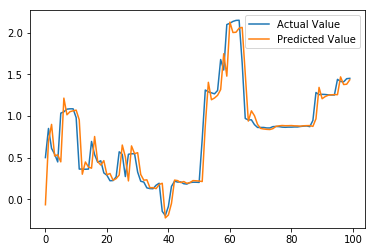

In [51]:
    try:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(y_test[:100],label='Actual Value')
        plt.plot(predicted[:100],label='Predicted Value')
        plt.legend()
        plt.show()
    except Exception as e:
        print (str(e))

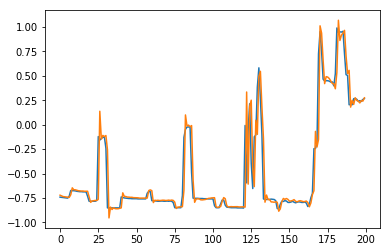

In [28]:
    try:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(y_test[400:600,])
        plt.plot(predicted[400:600])
        plt.show()
    except Exception as e:
        print (str(e))

In [29]:
from numpy import newaxis


In [30]:
X_test.shape, y_test.shape, 

((204923, 49, 1), (204923,))

In [31]:
predicted.size

204923

In [32]:
def moving_test_window_preds(n_future_preds):

    ''' n_future_preds - Represents the number of future predictions we want to make
                         This coincides with the number of windows that we will move forward
                         on the test data
    '''
    preds_moving = []                                    # Use this to store the prediction made on each test window
    moving_test_window = [X_test[0,:].tolist()]          # Creating the first test window
    moving_test_window = np.array(moving_test_window)    # Making it an numpy array
    
    for i in range(n_future_preds):
        preds_one_step = model.predict(moving_test_window) # Note that this is already a scaled prediction so no need to rescale this
        preds_moving.append(preds_one_step[0,0]) # get the value from the numpy 2D array and append to predictions
        preds_one_step = preds_one_step.reshape(1,1,1) # Reshaping the prediction to 3D array for concatenation with moving test window
        moving_test_window = np.concatenate((moving_test_window[:,1:,:], preds_one_step), axis=1) # This is the new moving test window, where the first element from the window has been removed and the prediction  has been appended to the end
        
    return preds_moving

In [33]:
preds_movin = moving_test_window_preds(50)

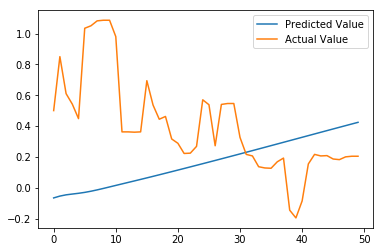

In [53]:
plt.plot(preds_movin,label='Predicted Value')
plt.plot(y_test[:50,],label='Actual Value')
plt.legend()

In [35]:
X_test.shape, y_test.shape

((204923, 49, 1), (204923,))

In [36]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [37]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((1844307, 49, 1), (1844307,), (204923, 49, 1), (204923,))

In [38]:
X_train1 = np.reshape(X_train, (1844307,49))

In [39]:
X_test1 = np.reshape(X_test, (204923,49))

In [40]:
rfr  = RandomForestRegressor(n_estimators = 50, random_state=2017,n_jobs=5)

In [41]:
rfr.fit(X_train1,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=5,
           oob_score=False, random_state=2017, verbose=0, warm_start=False)

In [42]:
predicted1 = rfr.predict(X_test1)

In [43]:
mean_squared_error(predicted1,y_test)

0.039667064595541715

In [44]:
mean_squared_error(predicted,y_test)

0.043289186931462435

In [45]:
predicted1

array([-0.0550981,  0.7543019,  0.9773019, ..., -0.1412581, -0.1550181,
       -0.1456581])